# 1.如何确定最优簇数K
肘部法则（Elbow Method），肘部法则通过绘制不同K值下的总平方误差（SSE）曲线，选择SSE下降速度明显减缓的点作为最优K值。
轮廓系数（Silhouette Score），轮廓系数则通过计算每个样本的轮廓系数，选择平均轮廓系数最高的K值作为最优K值。

## 肘部法则

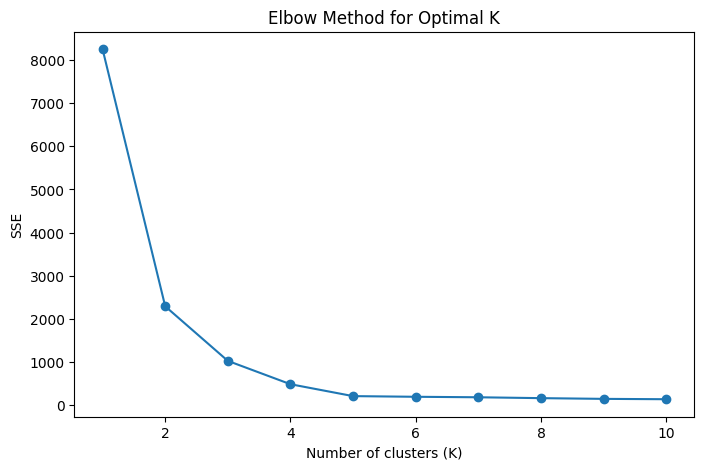

In [42]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt

# 生成示例数据
X, _ = make_blobs(n_samples=300, centers=5, cluster_std=0.6, random_state=0)

# 计算不同K值下的SSE
sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# 绘制肘部法则图
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
## 肘部法则的原理

肘部法则（Elbow Method）是一种确定聚类算法中最优簇数 \( K \) 的方法。其基本原理是通过观察不同簇数 \( K \) 下的总平方误差（SSE, Sum of Squared Errors）的变化趋势，找到一个“肘部”点。

#### 具体步骤：
1. **计算 SSE**：
    - SSE 是指数据点到其所属簇中心的欧几里得距离的平方和，公式如下：
      \[SSE = \sum_{i=1}^{n} \|x_i - c_{k(i)}\|^2\]
      其中，x_i 是数据点，c_{k(i)}是数据点所属簇的中心，\( n \) 是数据点的总数。

2. **绘制 SSE 曲线**：
    - 计算不同簇数 \( K \) 下的 SSE 值，并绘制 \( K \) 与 SSE 的关系曲线。

3. **寻找肘部点**：
    - 随着 \( K \) 的增加，SSE 会逐渐减小，因为簇数越多，每个簇的样本越少，样本到簇中心的距离越小。
    - 当 \( K \) 增加到某个值时，SSE 的下降幅度会明显减缓，曲线呈现出一个“肘部”形状。
    - 这个“肘部”点对应的 \( K \) 值即为最优簇数。

#### 注意事项：
- 肘部法则的效果依赖于数据的分布特性，有时肘部点可能不明显。
- 在实际应用中，可以结合其他方法（如轮廓系数）辅助判断最优 \( K \) 值。

## 轮廓系数法

[None, 0.6981588583757065, 0.595670734033931, 0.5857494678411528, 0.7222571625994793, 0.6458541918795841, 0.580260205213494, 0.5330867137101041, 0.4300706106204588, 0.36064482894786676]


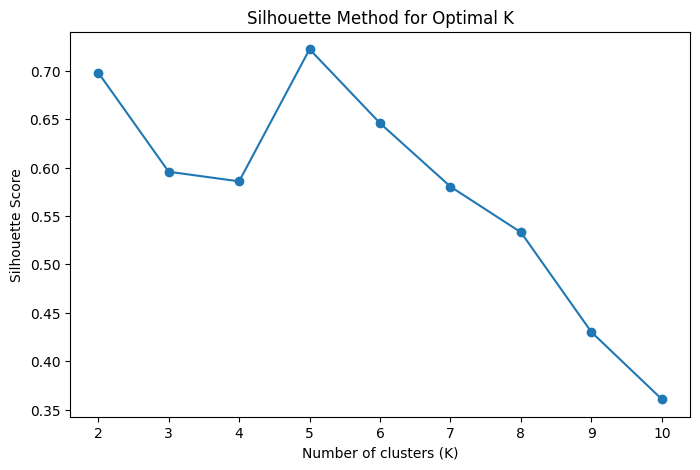

In [43]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in k_values:
    if k == 1:  # 跳过 k=1 的情况
        silhouette_scores.append(None)
        continue
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
print(silhouette_scores)
# 绘制轮廓系数图
plt.figure(figsize=(8, 5))
plt.plot(k_values[1:], silhouette_scores[1:], marker='o')  # 从 k=2 开始绘制
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal K')
plt.show()

In [ ]:
在轮廓分析法中，轮廓系数（Silhouette Score）是衡量聚类质量的指标，其值范围在 -1 到 1 之间。以下是如何分析轮廓分析法的结果：

1. **轮廓系数的含义**：
    - **接近 1**：表示样本被很好地聚类，且分配到的簇是最合适的。
    - **接近 0**：表示样本可能位于两个簇的边界上。
    - **接近 -1**：表示样本被错误地分配到某个簇。

2. **选择最优 K 值**：
    - 在 `silhouette_scores` 列表中，找到轮廓系数最高的 K 值。这个 K 值对应的聚类结果通常是最优的。
    - 在当前数据中，`silhouette_scores` 的值为 `[None, 0.698, 0.596, 0.586, 0.722, 0.646, 0.580, 0.533, 0.430, 0.361]`，可以看到 K=5 时轮廓系数最高（0.722），因此 K=5 是最优的簇数。

3. **绘图辅助分析**：
    - 通过绘制轮廓系数随 K 值变化的曲线，可以直观地观察到最佳 K 值的位置。
    - 如果曲线在某个点之后逐渐下降，说明增加簇数并不能显著提高聚类质量。

4. **结合业务背景**：
    - 虽然轮廓系数提供了一个数学上的最优 K 值，但在实际应用中，还需要结合业务背景和数据的实际含义来选择合适的 K 值。

总结：在当前分析中，K=5 是最优的簇数，因为它的轮廓系数最高，说明聚类效果最好。

# 数据必须标准化

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

# 完整的实践流程

In [44]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt 
import seaborn as sns

In [45]:
data = pd.read_csv('E:/桌面/数据分析项目实战/data/housing.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [46]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [47]:
# 选择聚类特征
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income']
X = data[features]

In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
# 轮廓系数法
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

In [50]:
# 肘部法则
sse = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

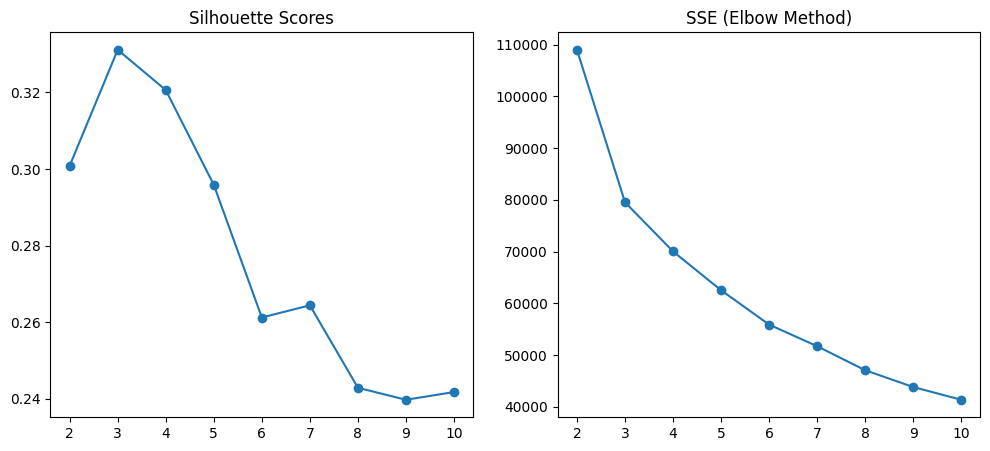

In [51]:
# 可视化
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(k_values, silhouette_scores, marker='o')
ax[1].plot(k_values, sse, marker='o')
ax[0].set_title('Silhouette Scores')
ax[1].set_title('SSE (Elbow Method)')
plt.show

In [52]:
# k为3时最好
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

In [56]:
# 分析聚类结果
cluster_summary = data.groupby('cluster')[features].mean()
print(cluster_summary.loc[0, :])

longitude             -118.018672
latitude                33.942869
housing_median_age      29.644136
total_rooms           2178.197080
population            1270.391404
households             429.159151
median_income            3.881060
Name: 0, dtype: float64


In [ ]:
# 如何分析该聚类结果

聚类结果的分析主要包括以下几个方面：

## 1. 聚类中心的解释
- 查看每个簇的中心点（即 `cluster_summary`），分析每个簇的特征均值。
- 通过特征均值，可以总结每个簇的特征，例如：
    - 哪些簇的 `median_income` 较高，可能代表高收入区域。
    - 哪些簇的 `housing_median_age` 较高，可能代表老旧社区。

## 2. 簇的分布
- 检查每个簇中数据点的数量，确保聚类结果合理。
- 如果某些簇的样本数量过少，可能需要重新调整聚类参数（如 `n_clusters`）。

## 3. 可视化分析
- 使用散点图可视化聚类结果，例如：
    - 选择两个特征（如 `longitude` 和 `latitude`）绘制地理位置上的簇分布。
    - 如果簇的分布与地理位置相关，可以进一步分析地理特征对聚类的影响。
- 使用箱线图或柱状图分析每个簇在某些特征上的分布。

## 4. 结合业务背景
- 将聚类结果与实际业务场景结合，分析每个簇的意义。
- 例如，在房价数据中，可以结合 `median_house_value` 分析每个簇的房价分布，判断哪些簇代表高房价区域，哪些簇代表低房价区域。

## 5. 验证聚类质量
- 使用轮廓系数（`silhouette_scores`）或其他指标验证聚类质量。
- 如果某些簇的轮廓系数较低，可能需要调整聚类参数或重新选择特征。

## 6. 深入分析
- 对每个簇进行进一步分析，例如：
    - 统计每个簇中 `ocean_proximity` 的分布，分析簇与海洋距离的关系。
    - 计算每个簇中 `median_house_value` 的均值和方差，分析房价的集中程度。

总结：通过以上步骤，可以全面分析聚类结果，理解每个簇的特征，并结合实际业务场景得出有意义的结论。

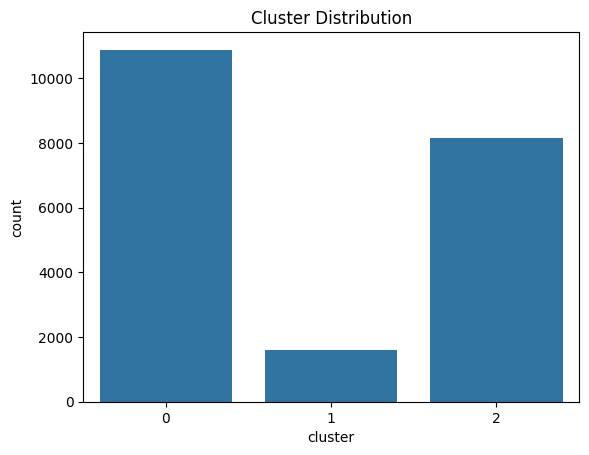

In [54]:
# 簇的分布
sns.countplot(x='cluster', data=data)
plt.title('Cluster Distribution')
plt.show()

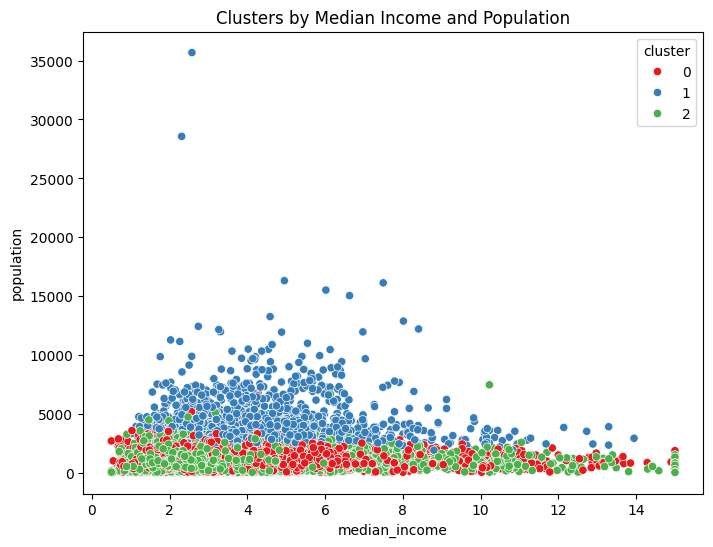

In [55]:
# 可视化分析（收入、人口）
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='median_income', y='population', hue='cluster', palette='Set1')
plt.title('Clusters by Median Income and Population')
plt.show()  

In [ ]:
# 分析收入与人口的可视化图

在收入与人口的可视化图中，我们可以从以下几个方面进行分析：

## 1. 簇的分布
- 观察不同簇在图中的分布情况。
- 检查每个簇的样本点是否集中，是否存在明显的边界。
- 如果某些簇的样本点分布较为分散，可能需要重新调整聚类参数。

## 2. 收入与人口的关系
- 分析收入（`median_income`）与人口（`population`）之间的关系。
- 检查是否存在某些簇的收入较高但人口较少，或者收入较低但人口较多的情况。
- 通过这些关系，可以推断出不同簇的特征，例如高收入低人口的区域可能是高端住宅区。

## 3. 簇的特征
- 结合簇的颜色（`hue='cluster'`），分析每个簇的特征。
- 例如，某些簇可能集中在高收入区域，而另一些簇可能集中在低收入区域。
- 通过观察簇的分布，可以进一步理解每个簇的特征。

## 4. 异常点
- 检查是否存在异常点，例如收入或人口特别高或特别低的点。
- 异常点可能会对聚类结果产生影响，需要进一步分析这些点的特征。

## 5. 结合业务背景
- 将可视化结果与实际业务场景结合，分析每个簇的意义。
- 例如，在房价数据中，可以结合房价信息分析每个簇的房价分布，判断哪些簇代表高房价区域，哪些簇代表低房价区域。

总结：通过分析收入与人口的可视化图，可以更好地理解聚类结果，并结合实际业务场景得出有意义的结论。